# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we use transfer learning to train a CNN to classify dog breeds.

### 1. Load Dog Dataset

Before running the code cell below, download the dataset of dog images [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip) and place it in the respository.

In [17]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob

def load_dataset(file):
    data = load_files(file)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), num_classes=133)
    return dog_files, dog_targets

train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

dog_names = [item.split('/')[2] for item in glob('dogImages/train/*/')]

print('25 Dog names: ',dog_names[:25])
print('Total num of dog images: {}'.format(len(train_files)+len(valid_files)+len(test_files)))
print('Total training dog images: {}'.format(len(train_files)))
print('Total validation dog images: {}'.format(len(valid_files)))
print('Total testing dog images: {}'.format(len(test_files)))

25 Dog names:  ['122.Pointer', '069.French_bulldog', '124.Poodle', '112.Nova_scotia_duck_tolling_retriever', '043.Canaan_dog', '024.Bichon_frise', '036.Briard', '086.Irish_setter', '078.Great_dane', '061.English_cocker_spaniel', '075.Glen_of_imaal_terrier', '089.Irish_wolfhound', '054.Collie', '109.Norwegian_elkhound', '077.Gordon_setter', '035.Boykin_spaniel', '007.American_foxhound', '084.Icelandic_sheepdog', '058.Dandie_dinmont_terrier', '076.Golden_retriever', '125.Portuguese_water_dog', '070.German_pinscher', '008.American_staffordshire_terrier', '123.Pomeranian', '026.Black_russian_terrier']
Total num of dog images: 8351
Total training dog images: 6680
Total validation dog images: 835
Total testing dog images: 836


### 2. Visualize the First 12 Training Images

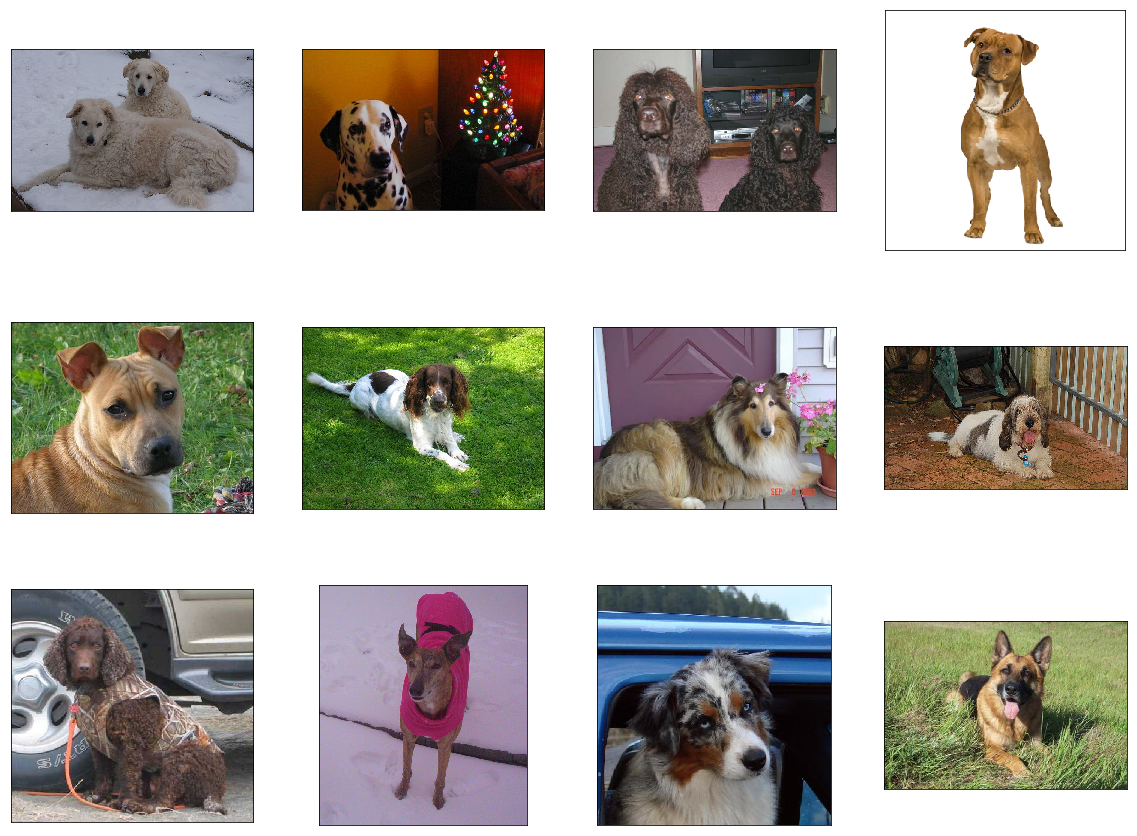

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def visualize_image(img_path, ax):
    img = cv2.imread(img_path)
    #cv2.imshow('img',img)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

fig = plt.figure(figsize=(20,15))
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1, xticks=[], yticks=[])
    visualize_image(train_files[i], ax)

### 3. Obtain the VGG-16 Bottleneck Features

Before running the code cell below, download the file linked [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz) and place it in the `bottleneck_features/` folder.

In [31]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_vgg16 = bottleneck_features['train']
test_vgg16 = bottleneck_features['test']
valid_vgg16 = bottleneck_features['valid']

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

### 4. Define a Model Architecture (Model 1)

In [35]:
model = Sequential()
model.add(Flatten(input_shape=(7,7,512)))
model.add(Dense(133, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               3336837   
Total params: 3,336,837
Trainable params: 3,336,837
Non-trainable params: 0
_________________________________________________________________


### 5. Define another Model Architecture (Model 2)

In [37]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(Dense(133,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### 6. Compile the Model (Model 2)

In [69]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 7. Train the Model (Model 2)

In [74]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='dogvgg16.weights.best.mine.hdf5', verbose=1, save_best_only=True)

hist = model.fit(train_vgg16,train_targets, epochs=30, callbacks=[checkpointer],
                 validation_data=(valid_vgg16,valid_targets), verbose=2, shuffle=True)

Train on 6680 samples, validate on 835 samples
Epoch 1/30
 - 1s - loss: 4.0707 - acc: 0.7472 - val_loss: 5.4719 - val_acc: 0.5928

Epoch 00001: val_loss improved from inf to 5.47189, saving model to dogvgg16.weights.best.mine.hdf5
Epoch 2/30
 - 1s - loss: 4.0713 - acc: 0.7473 - val_loss: 5.4573 - val_acc: 0.5952

Epoch 00002: val_loss improved from 5.47189 to 5.45726, saving model to dogvgg16.weights.best.mine.hdf5
Epoch 3/30
 - 1s - loss: 4.0718 - acc: 0.7470 - val_loss: 5.4710 - val_acc: 0.5904

Epoch 00003: val_loss did not improve from 5.45726
Epoch 4/30
 - 1s - loss: 4.0712 - acc: 0.7472 - val_loss: 5.4731 - val_acc: 0.5952

Epoch 00004: val_loss did not improve from 5.45726
Epoch 5/30
 - 2s - loss: 4.0702 - acc: 0.7472 - val_loss: 5.4904 - val_acc: 0.5940

Epoch 00005: val_loss did not improve from 5.45726
Epoch 6/30
 - 2s - loss: 4.0711 - acc: 0.7472 - val_loss: 5.4764 - val_acc: 0.5940

Epoch 00006: val_loss did not improve from 5.45726
Epoch 7/30
 - 1s - loss: 4.0718 - acc: 0.

### 8. Load the Model with the Best Validation Accuracy (Model 2)

In [75]:
model.load_weights('dogvgg16.weights.best.mine.hdf5')

### 9. Calculate Classification Accuracy on Test Set (Model 2)

In [76]:
# get index of predicted dog breed for each image in test set
vgg16_predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) 
                     for feature in test_vgg16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(vgg16_predictions)==
                           np.argmax(test_targets, axis=1))/len(vgg16_predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy)


Test accuracy: 58.1340%


In [77]:
score = model.evaluate(test_vgg16, test_targets)
score[1]

836/836 [==============================] - 0s 74us/step


0.5813397129186603